# Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer,StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import warnings 
warnings.filterwarnings('ignore')

## Step 2: Load the Dataset

In [4]:
df = pd.read_csv('archive/walmart.csv')

## Step 3: Understand the Dataset

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Step 4: Handle Missing Values

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(6435, 8)

In [11]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [12]:
### extract date to weekend, month, year

In [13]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [14]:
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

### Perform EDA on dataset

In [15]:
# weekly sales distribution

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

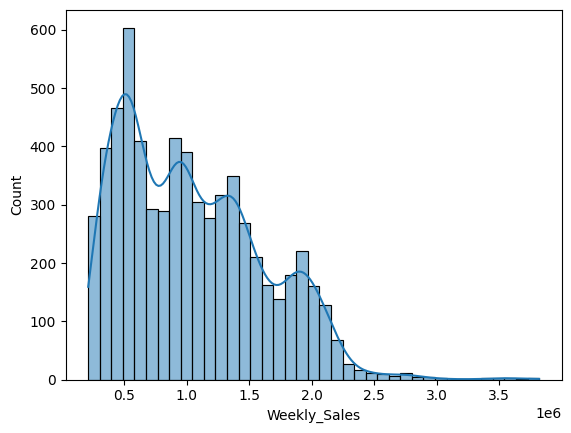

In [16]:
sns.histplot(x='Weekly_Sales',data=df,kde=True)

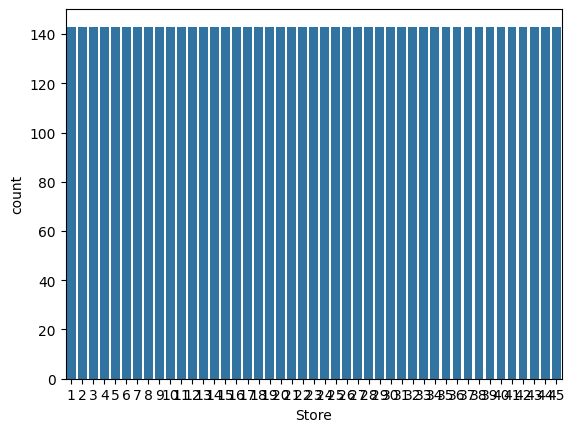

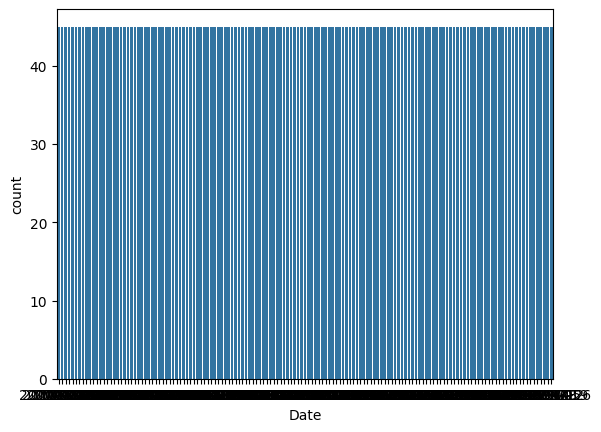

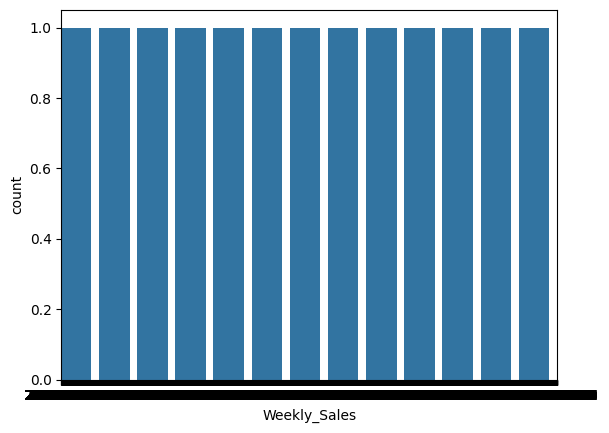

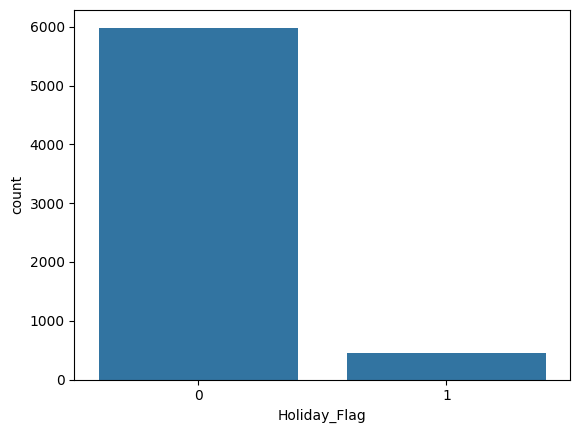

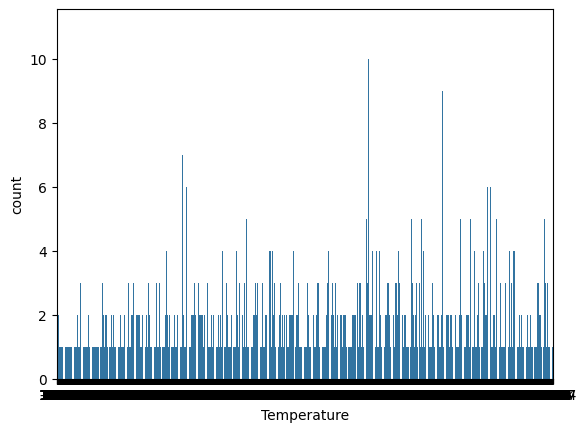

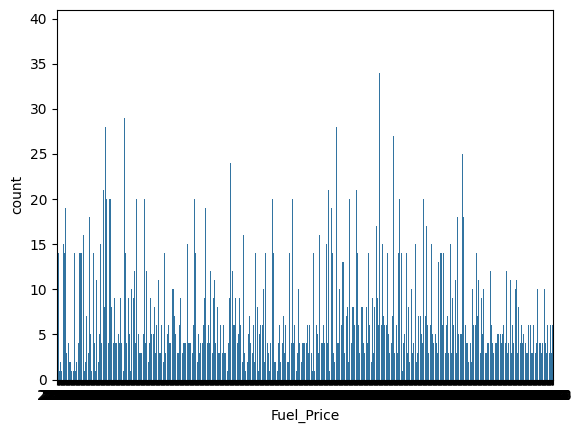

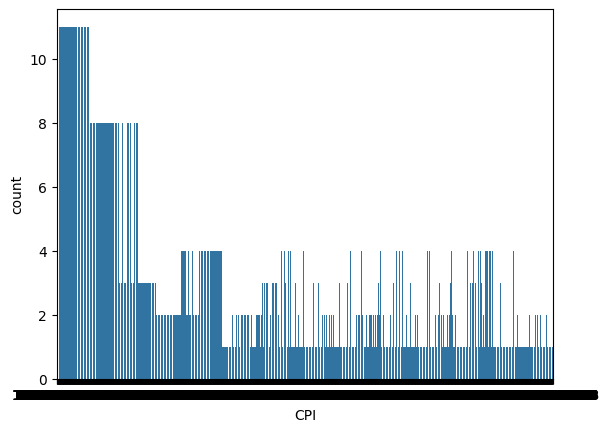

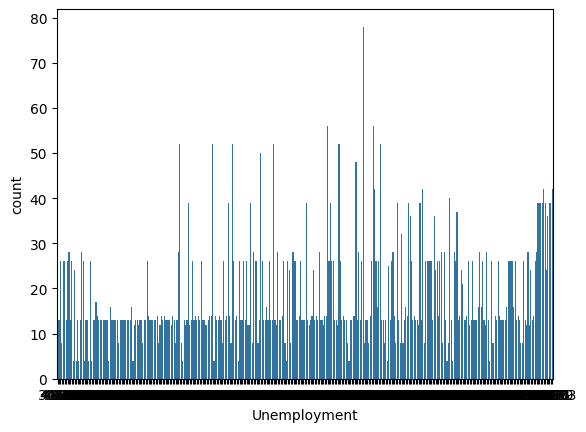

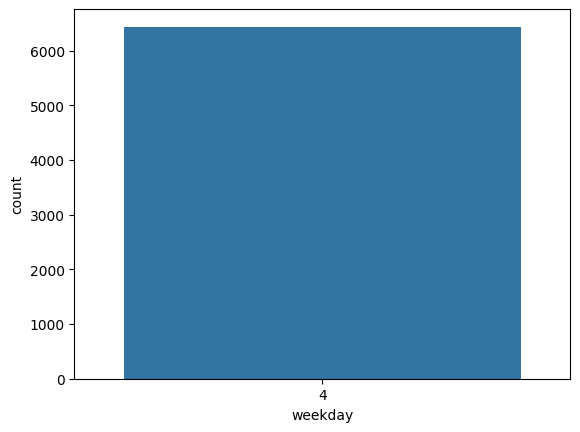

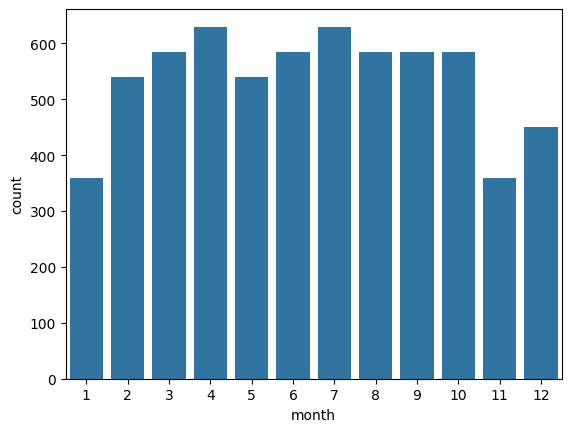

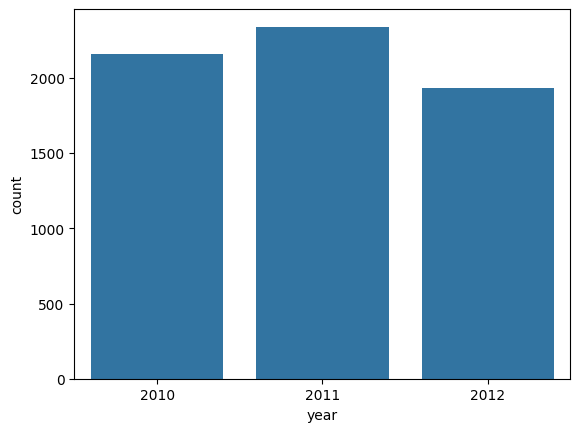

In [17]:
for i in df.columns:
    sns.countplot(x=df[i])
    plt.show()

In [18]:
num_col = df.dtypes[df.dtypes != 'object'].index

In [19]:
num_col

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

In [20]:
#### Numerical column

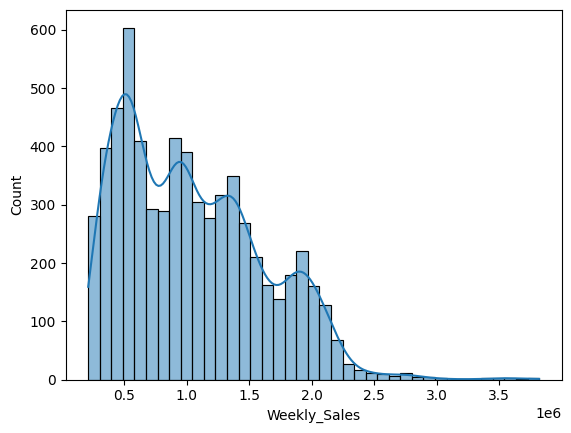

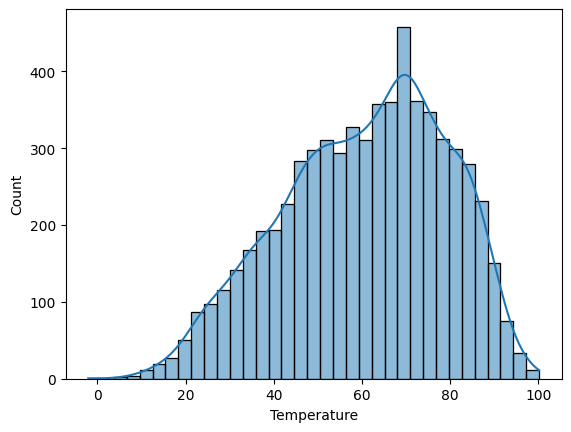

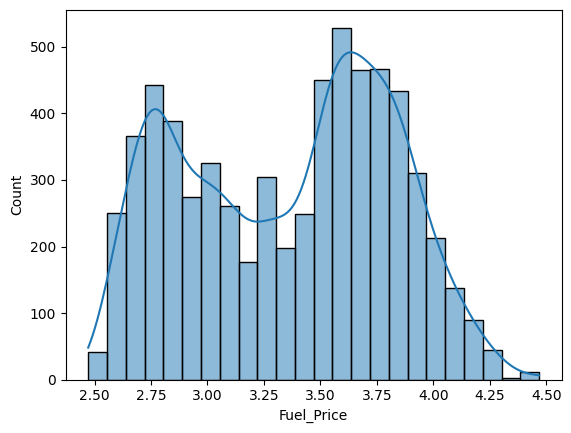

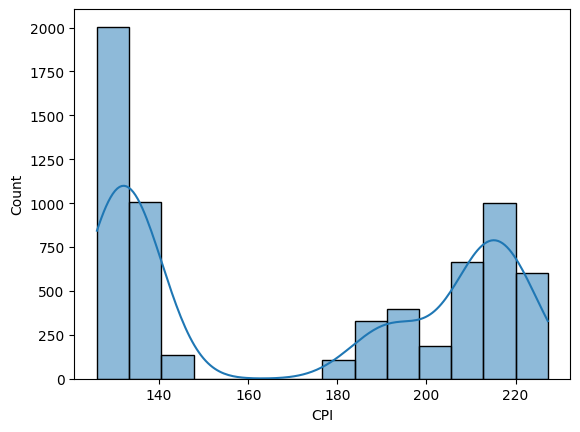

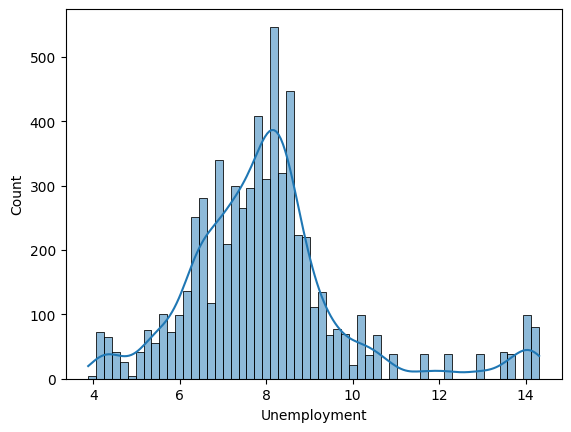

In [21]:
for i in ['Weekly_Sales','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    sns.histplot(x=df[i],kde=True)
    plt.show()

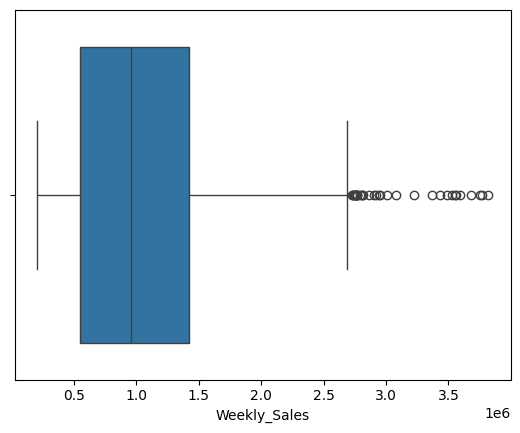

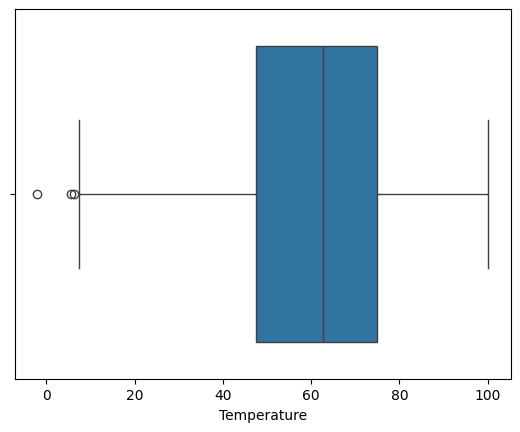

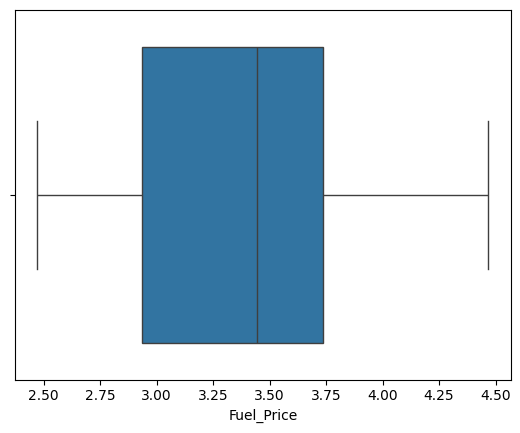

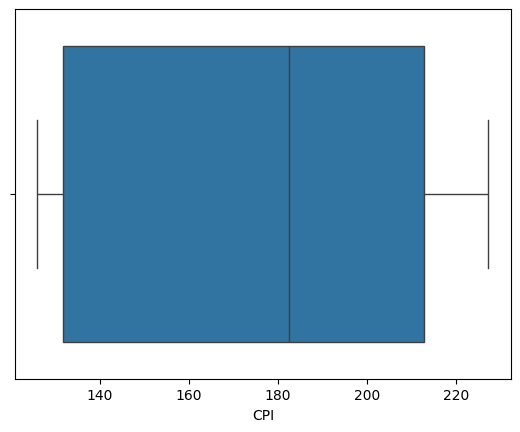

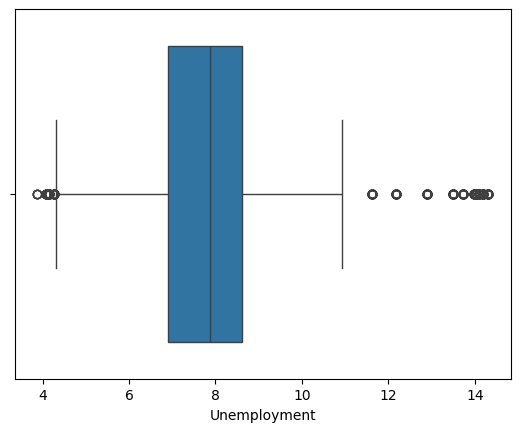

In [22]:
for i in ['Weekly_Sales','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    sns.boxplot(x=df[i])
    plt.show()

In [23]:
### categorical column

In [24]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

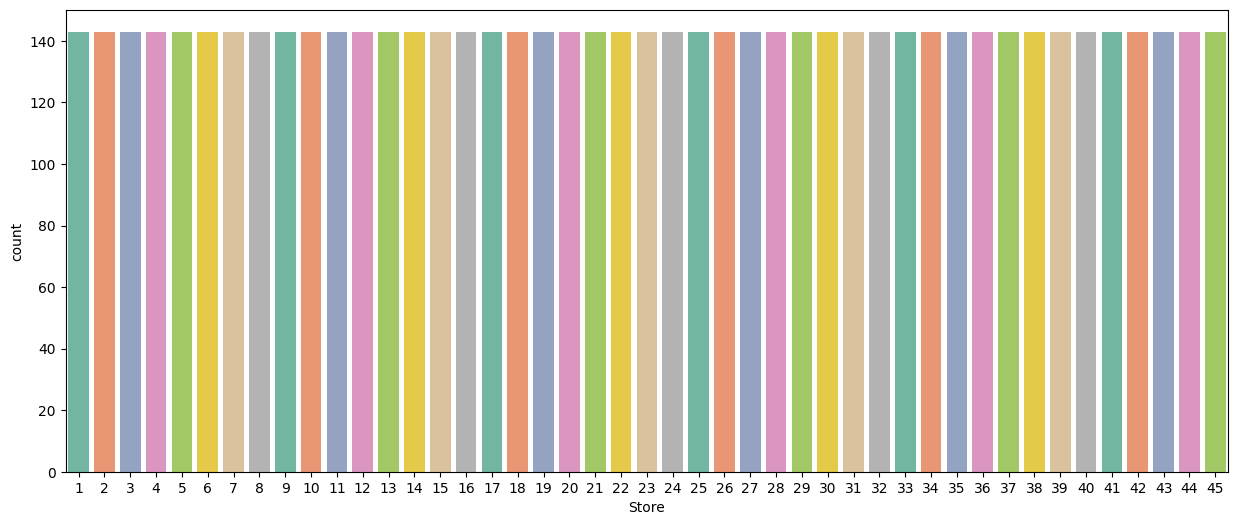

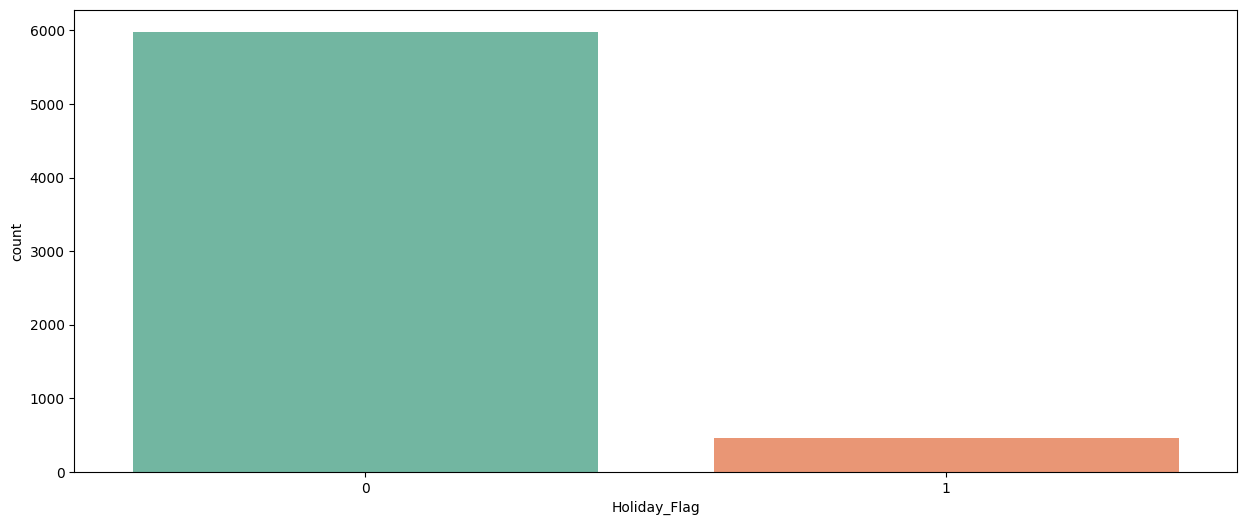

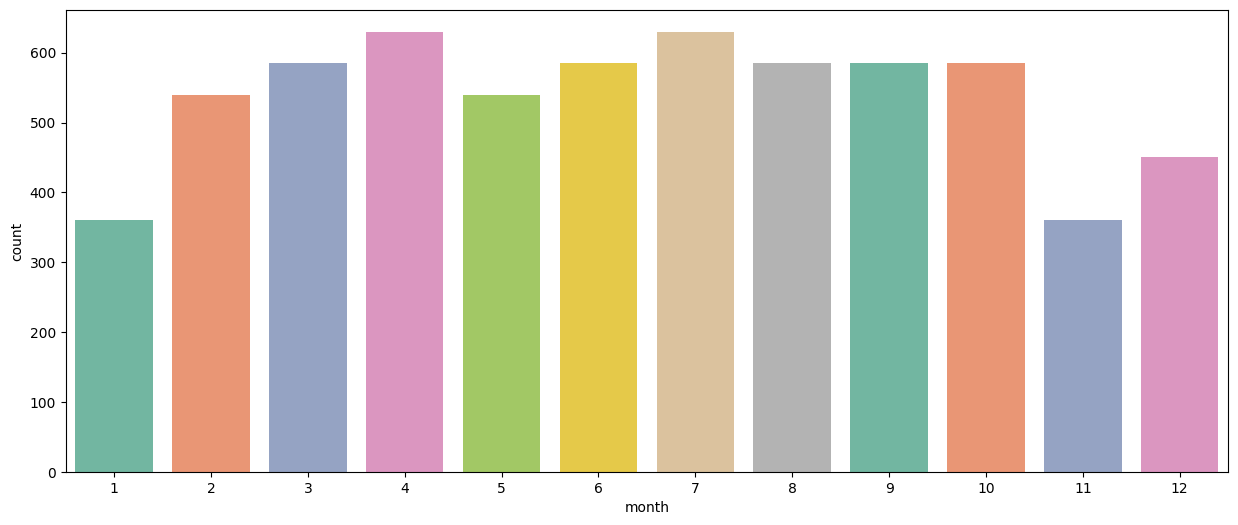

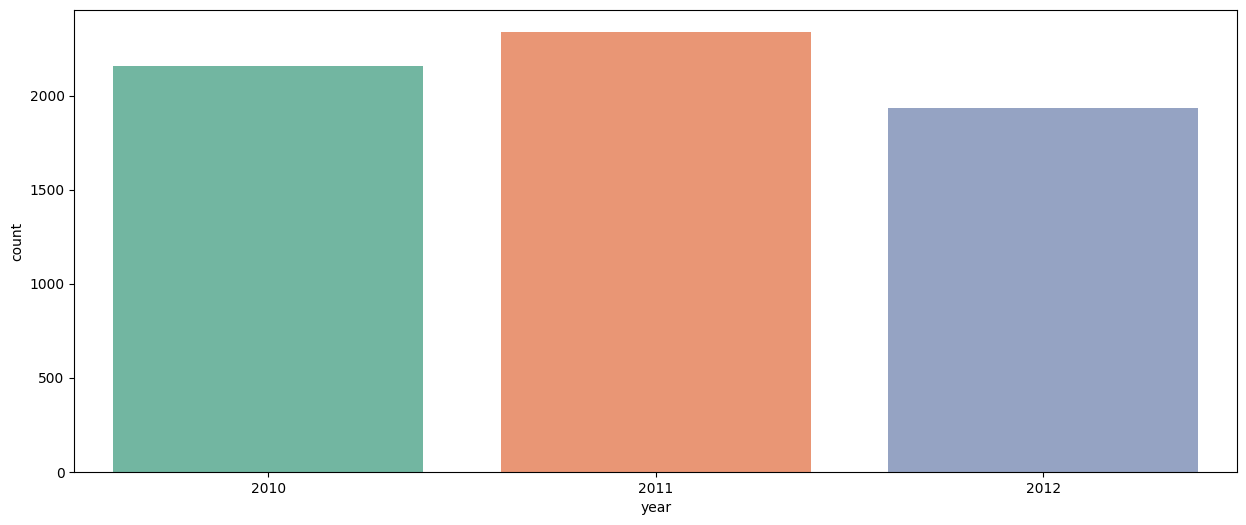

In [25]:
for i in ['Store', 'Holiday_Flag', 'month', 'year']:
    plt.figure(figsize=[15,6])
    sns.countplot(x=df[i], palette='Set2')
    plt.show()

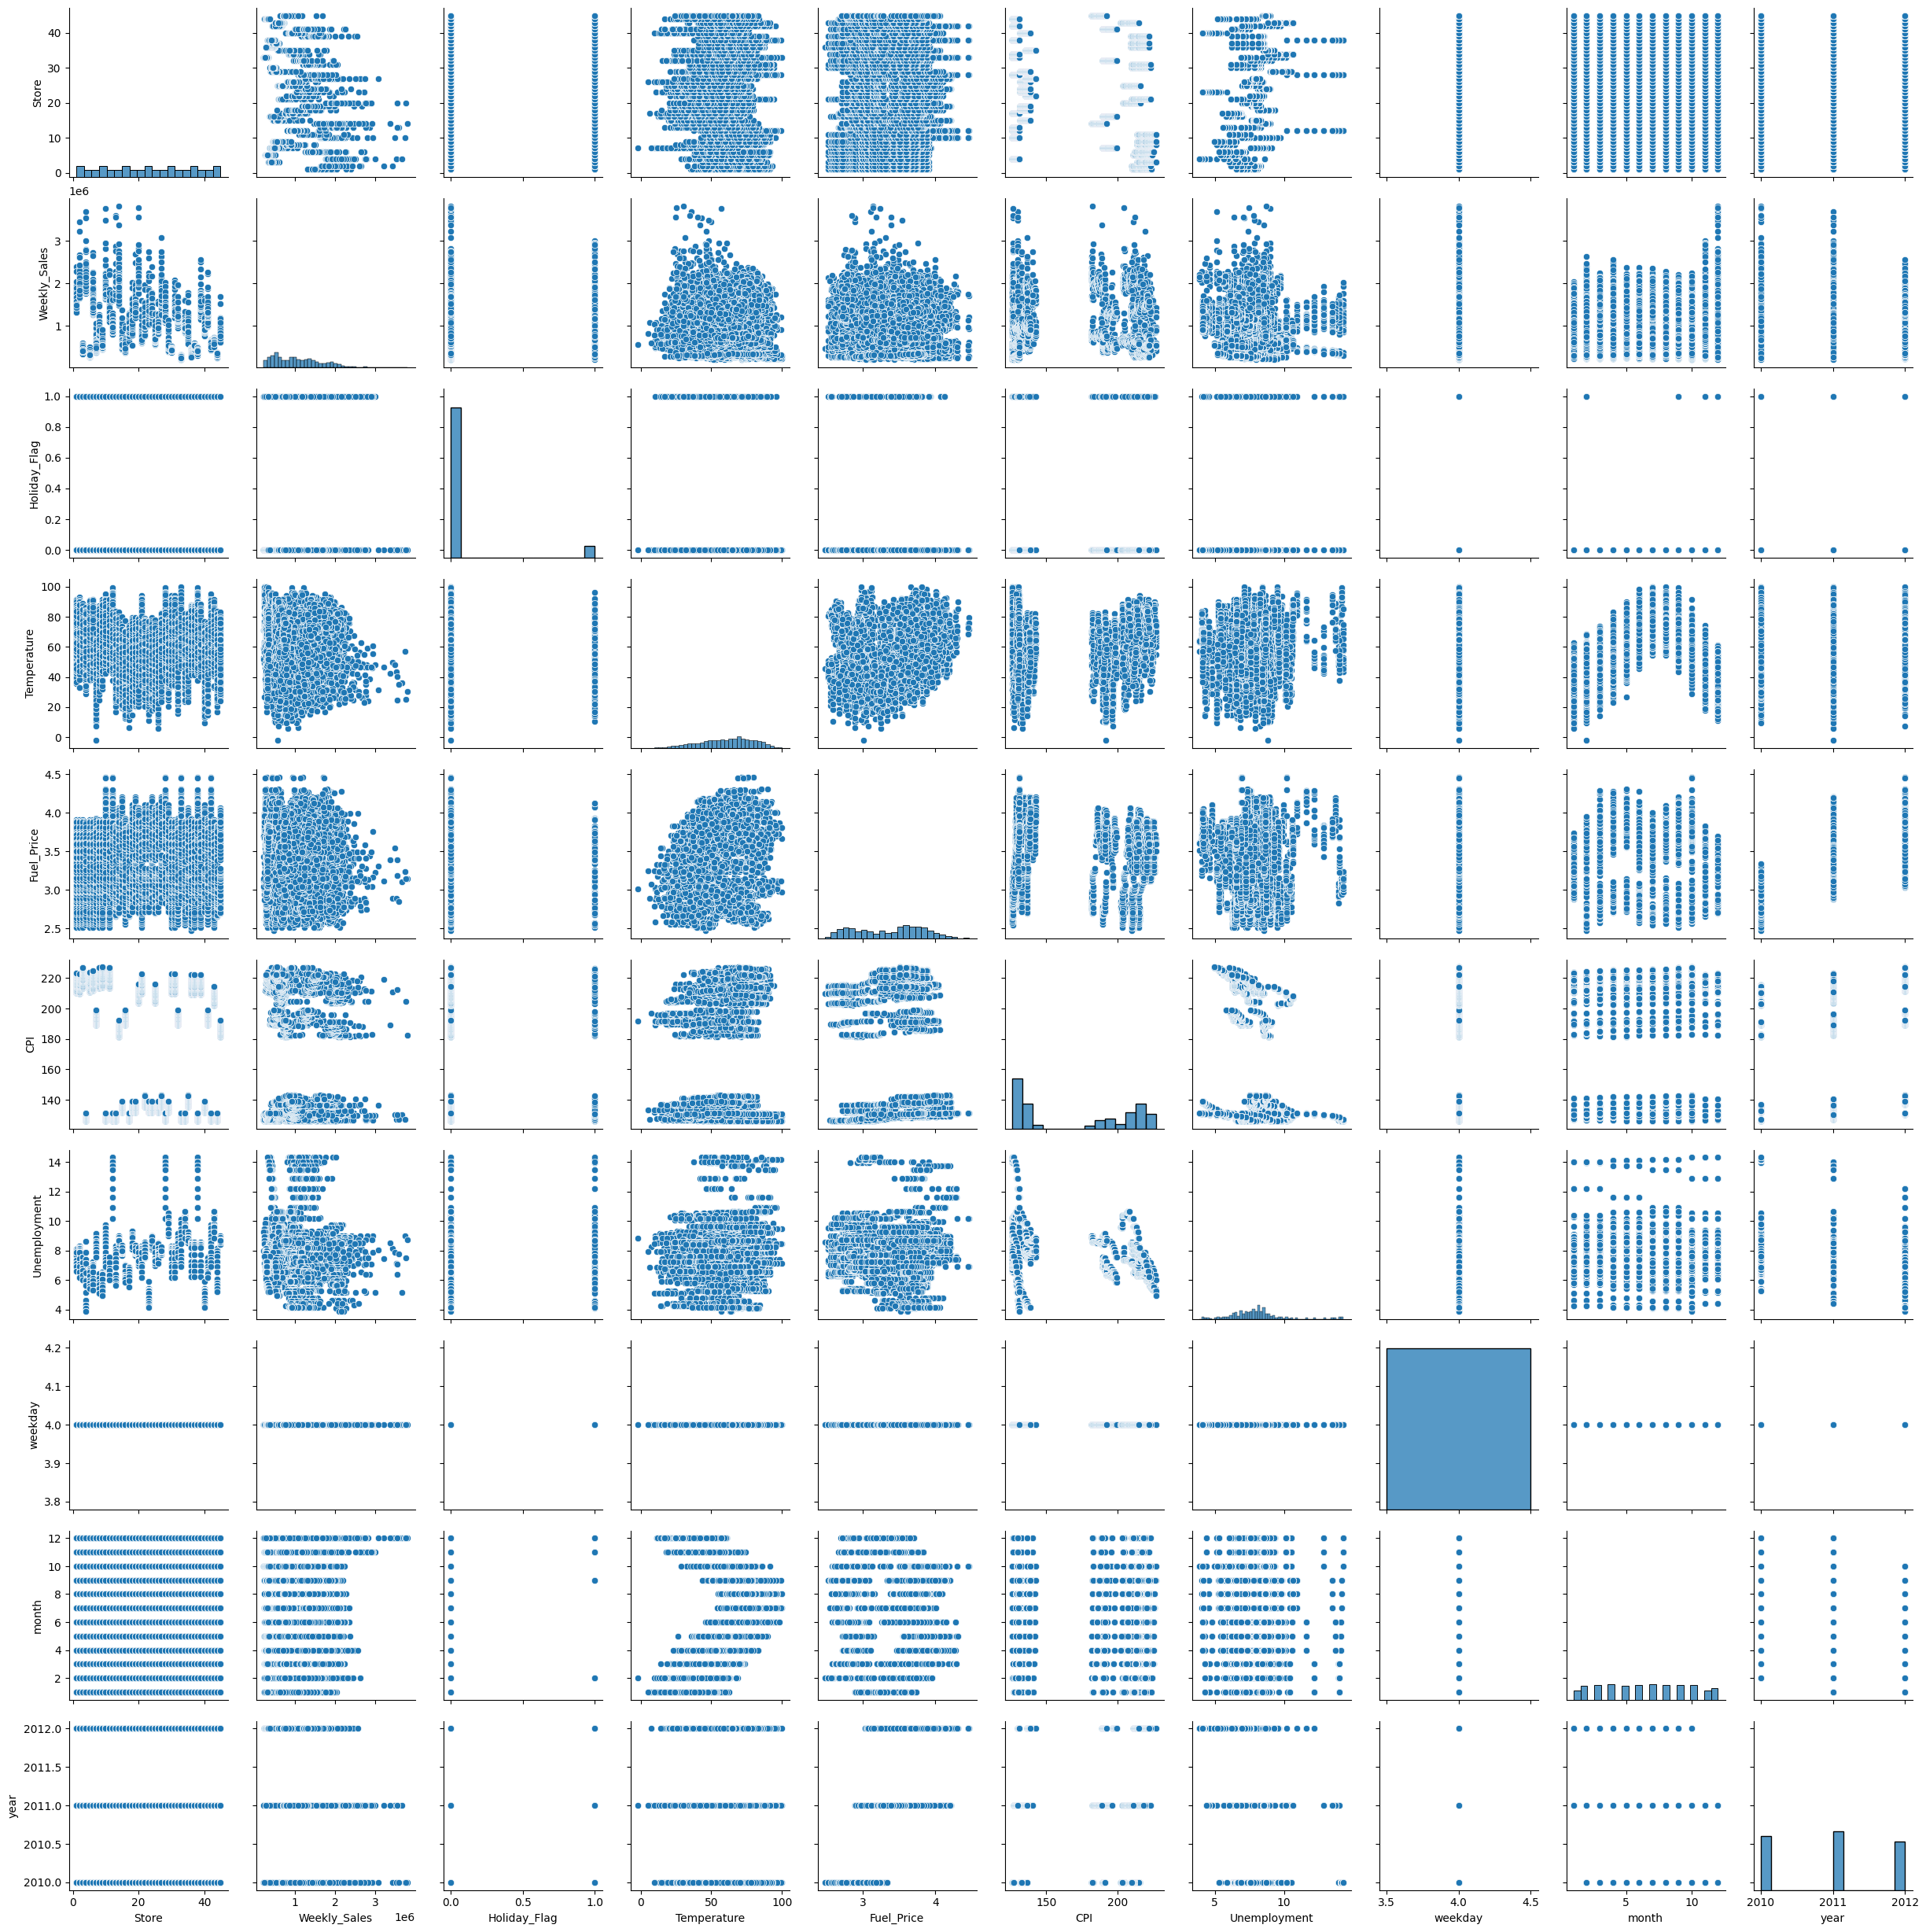

In [26]:
sns.pairplot(df)

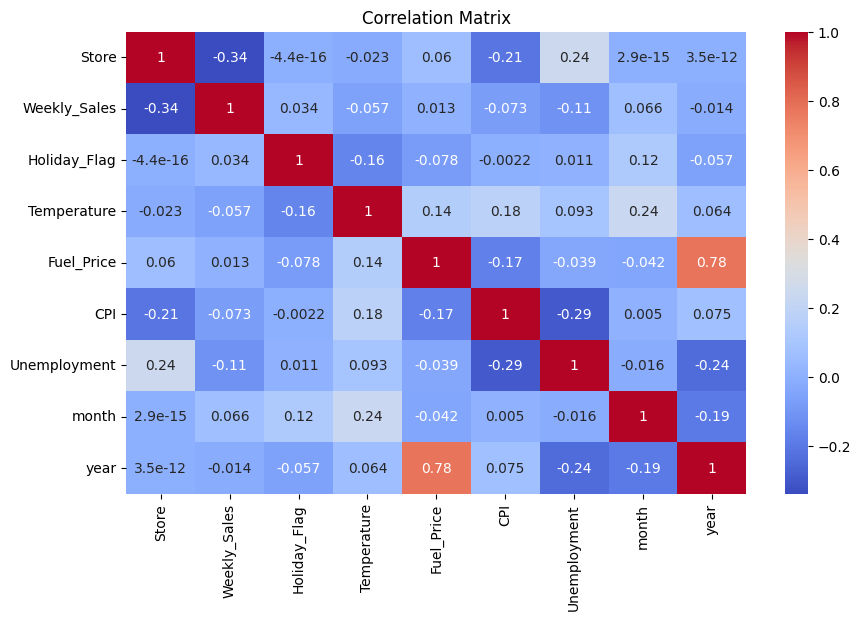

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [27]:
# total sales over time

In [28]:
weekly_sales = df.groupby('month')['Weekly_Sales'].sum().reset_index()

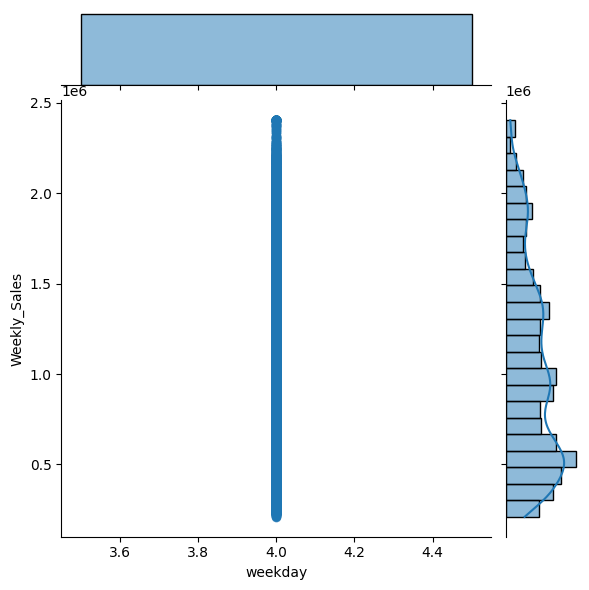

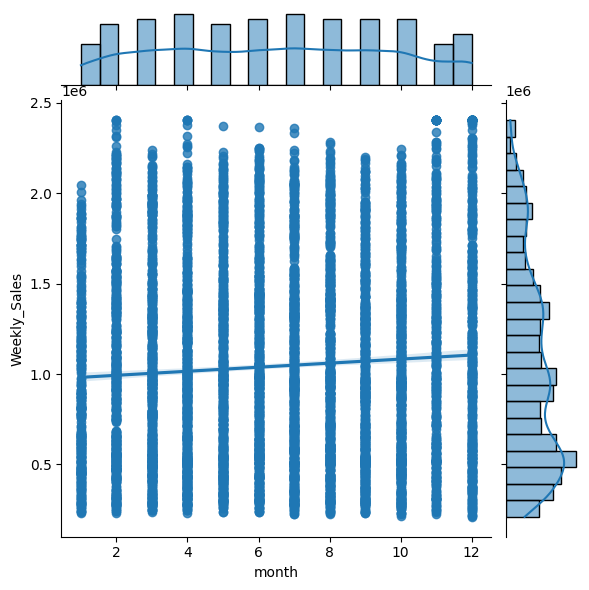

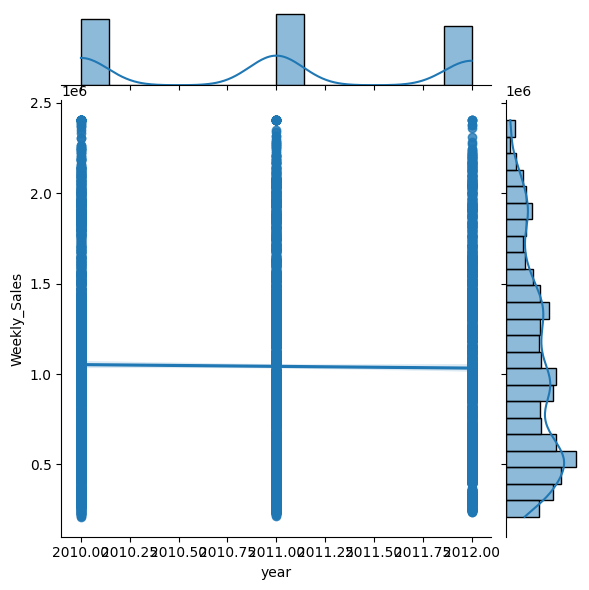

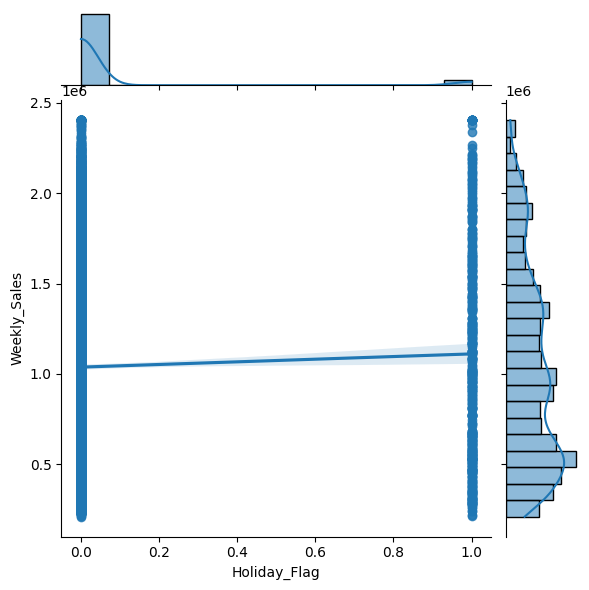

In [55]:
for i in ['weekday','month','year','Holiday_Flag']:
    sns.jointplot(data=df, x=df[i], y='Weekly_Sales', kind='reg')
    #sns.histplot(y=,x=df[i], palette='Set2')
    plt.show()

## Handling Outliers

In [30]:
outlier =['Weekly_Sales','Temperature', 'Unemployment']

In [31]:
for i in outlier:
    Q3 = df[i].quantile(0.75)
    Q1 = df[i].quantile(0.25)
    iqr = Q3 - Q1
    upper = Q3 + 1.5*iqr
    lower = Q1 - 1.5*iqr
    print(f'{i} - upper: {upper}  lower: {lower}')

Weekly_Sales - upper: 2720371.4924999997  lower: -746862.7275
Temperature - upper: 116.16  lower: 6.240000000000002
Unemployment - upper: 11.218499999999999  lower: 4.2945


In [32]:
df['Weekly_Sales'].quantile(0.99)

2404035.3049999997

In [33]:
df['Weekly_Sales'].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99])

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
1%       2.531031e+05
2%       2.752586e+05
5%       3.084267e+05
50%      9.607460e+05
95%      2.049179e+06
98%      2.203919e+06
99%      2.404035e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [34]:
df.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99])

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
1%,1.000000,2010-02-12 00:00:00,2.531031e+05,0.000000,18.523600,2.565000,126.106903,4.156000,4.0,1.000000,2010.000000
2%,1.000000,2010-02-19 00:00:00,2.752586e+05,0.000000,21.867200,2.582000,126.136065,4.420000,4.0,1.000000,2010.000000
5%,3.000000,2010-03-26 00:00:00,3.084267e+05,0.000000,27.730000,2.642000,126.491290,5.326000,4.0,1.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
95%,43.000000,2012-09-07 00:00:00,2.049179e+06,1.000000,87.663000,4.029000,221.926729,12.187000,4.0,12.000000,2012.000000
98%,45.000000,2012-10-12 00:00:00,2.203919e+06,1.000000,91.103200,4.153000,224.848001,14.021000,4.0,12.000000,2012.000000
99%,45.000000,2012-10-19 00:00:00,2.404035e+06,1.000000,93.190000,4.203000,225.470151,14.180000,4.0,12.000000,2012.000000


In [35]:
### handling the outlier

In [36]:
df['Weekly_Sales'] = df['Weekly_Sales'].clip(upper = df['Weekly_Sales'].quantile(0.99))
df['Unemployment'] = df['Unemployment'].clip(lower = df['Unemployment'].quantile(0.01),upper = df['Unemployment'].quantile(0.95))

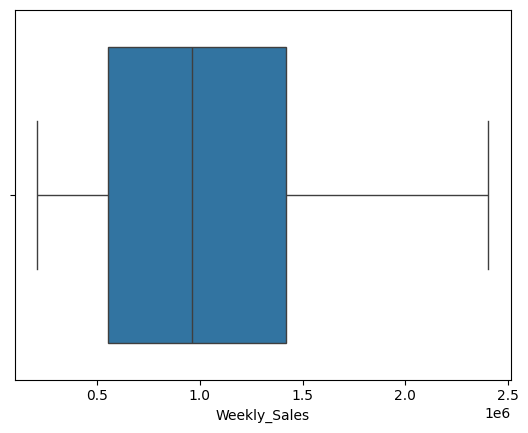

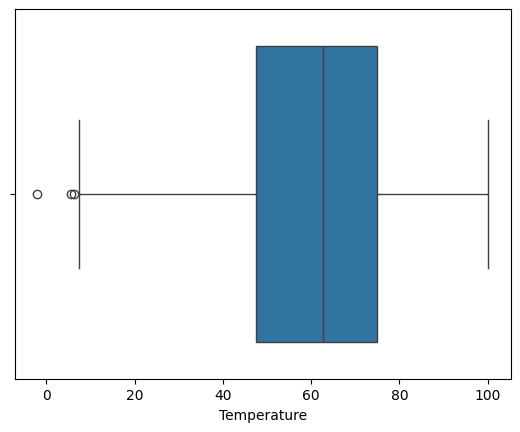

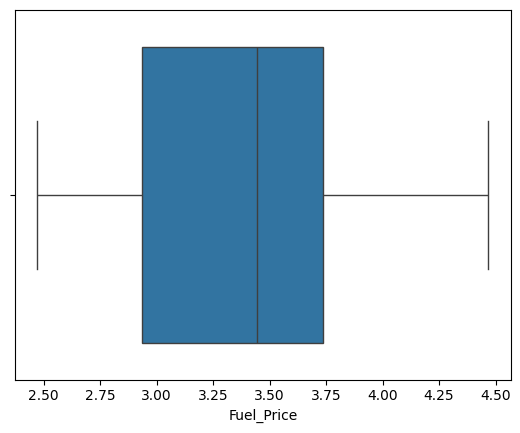

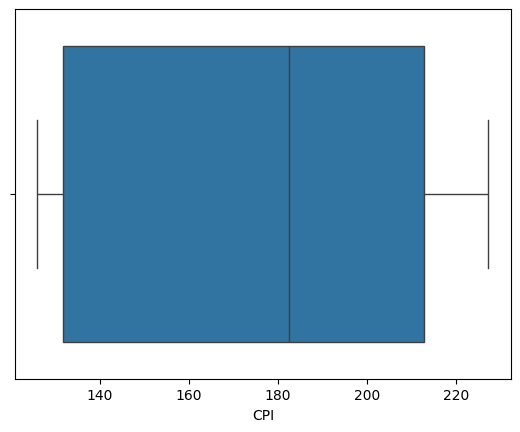

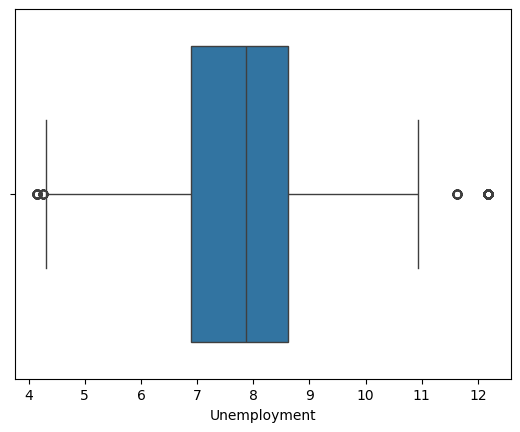

In [37]:
for i in ['Weekly_Sales','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    sns.boxplot(x=df[i])
    plt.show()

In [38]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6371
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     337
weekday            1
month             12
year               3
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   weekday       6435 non-null   int32         
 9   month         6435 non-null   int32         
 10  year          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


In [56]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

In [57]:
df.drop('Date',inplace = True,axis=1)

In [58]:
df.drop('weekday',inplace = True,axis=1)

In [59]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


In [60]:
num = ['Temperature','Fuel_Price', 'CPI', 'Unemployment']
cat = ['month', 'year','Holiday_Flag','Store']

In [62]:
x = df.drop('Weekly_Sales',axis=1)

In [63]:
y = df['Weekly_Sales']

In [67]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [68]:
preprossesor = ColumnTransformer(
    transformers = [
        ('num',num_transformer,num),
        ('cat',cat_transformer,cat)
    ]
)

## Linear Model

In [70]:
lr_model = Pipeline(steps=[
    ('preprocessor',preprossesor),
    ('Regressor',LinearRegression())
])

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [73]:
lr_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['month', 'year',
                                                   'Holiday_Flag',
                                                   'Store'])])),
                ('Regressor', LinearRegression())])

In [75]:
y_pred = lr_model.predict(x_test)

In [93]:
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred)):.2f}')
print(f'mae:{mean_absolute_error(y_test,y_pred):.2f}')
print(f'r2_score:{r2_score(y_test,y_pred):.2f}')

rmse:123862.38
mae:82639.36
r2_score:0.95


## random forest

In [102]:
rf = Pipeline(steps=[
    ('preprocessor',preprossesor),
    ('regressor',RandomForestRegressor(random_state=42,n_jobs=-1))
])

In [103]:
rf.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['month', 'year',
                                                   'Holiday_Flag',
                                                   'Store'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [104]:
y_pred = rf.predict(x_test)

In [105]:
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred)):.2f}')
print(f'mae:{mean_absolute_error(y_test,y_pred):.2f}')
print(f'r2_score:{r2_score(y_test,y_pred):.2f}')

rmse:112447.35
mae:63554.75
r2_score:0.96


## Random forest + hyperparameter 

In [106]:
# Param grid
param_list = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features': ['auto', 'sqrt']
}


random_search = RandomizedSearchCV(rf, param_distributions=param_list, 
                                   n_iter=20, cv=3, scoring='neg_mean_squared_error', 
                                   verbose=2, n_jobs=-1)

random_search.fit(x_train, y_train)

best_rf_model = random_search.best_estimator_
print("Best RF Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best RF Parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}


In [107]:
y_pred = best_rf_model.predict(x_test)

In [108]:
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred)):.2f}')
print(f'mae:{mean_absolute_error(y_test,y_pred):.2f}')
print(f'r2_score:{r2_score(y_test,y_pred):.2f}')

rmse:108984.63
mae:62747.22
r2_score:0.96


## xgboost

In [111]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprossesor),
    ('regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
])

In [112]:
xgb_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['month', 'year',
                                                   'Holiday_Flag',
                                                   'Store'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsam...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [113]:
y_pred = xgb_model.predict(x_test)

In [114]:
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred)):.2f}')
print(f'mae:{mean_absolute_error(y_test,y_pred):.2f}')
print(f'r2_score:{r2_score(y_test,y_pred):.2f}')

rmse:97424.37
mae:58022.11
r2_score:0.97


## xgboost + hyperparameter

In [116]:
param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.3]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(x_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

Best XGBoost Parameters: {'regressor__learning_rate': 0.3, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}


In [117]:
grid_search_xgb.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Temperature',
                                                                          'Fuel_Price',
                                                                          'CPI',
                                                                          'Unemployment']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['month',
                                                                          'year',
                                                                          'Holiday_Flag',
                                                                          'Store'])])),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.3],
                         'regressor__max_depth': [3, 6, 10],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [118]:
y_pred = grid_search_xgb.predict(x_test)

In [119]:
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_pred)):.2f}')
print(f'mae:{mean_absolute_error(y_test,y_pred):.2f}')
print(f'r2_score:{r2_score(y_test,y_pred):.2f}')

rmse:94132.23
mae:59014.35
r2_score:0.97
